# Step 1. Data collection

In [37]:
import pandas as pd
from pathlib import Path
DATA_FOLDER_PATH = Path("data")
DATASET_PATH = DATA_FOLDER_PATH / "language_dataset.csv"

# Step 2. Preprocessing

In [38]:
import pandas as pd
import re

# Load dataset
df = pd.read_csv(DATASET_PATH, encoding="utf-8")

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Keep only letters and spaces (supporting multiple scripts)
    text = re.sub(r'[^a-zA-Zа-яА-Яәғқңөұүһіёéèàçùœ\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess_text)

# Save the cleaned dataset (optional)
df.to_csv(CLEAN_DATASET_PATH, index=False, encoding="utf-8")

print("✅ Preprocessing complete. Clean text preview:\n")
print(df[["text", "clean_text", "language"]].head(8))


✅ Preprocessing complete. Clean text preview:

                                     text  \
0       The city is quiet in the morning.   
1  She likes reading books about history.   
2  This restaurant serves delicious food.   
3     We are planning a trip next summer.   
4     The internet has changed the world.   
5     Бүгін мектепте жаңа сабақ басталды.   
6      Менің атым Айдана, мен студентпін.   
7           Ол музыка тыңдағанды ұнатады.   

                              clean_text language  
0       the city is quiet in the morning  English  
1  she likes reading books about history  English  
2  this restaurant serves delicious food  English  
3     we are planning a trip next summer  English  
4     the internet has changed the world  English  
5     бүгін мектепте жаңа сабақ басталды   Kazakh  
6       менің атым айдана мен студентпін   Kazakh  
7           ол музыка тыңдағанды ұнатады   Kazakh  


# Step 3. Features

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed dataset
df = pd.read_csv(CLEAN_DATASET_PATH, encoding="utf-8")

# === TF-IDF Vectorization ===
# Use both single letters and bigrams
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))

# Fit and transform
X = vectorizer.fit_transform(df["clean_text"])
y = df["language"]

print("✅ Feature extraction complete.")
print(f"Matrix shape: {X.shape}")  # (samples, features)
print(f"Number of features: {len(vectorizer.get_feature_names_out())}")

# Show example feature names
print("\nSample features:", vectorizer.get_feature_names_out()[:15])


✅ Feature extraction complete.
Matrix shape: (20, 389)
Number of features: 389

Sample features: [' ' ' a' ' b' ' c' ' d' ' e' ' f' ' h' ' i' ' j' ' l' ' m' ' n' ' p' ' q']


# Step 4. Model training

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [41]:
# === Feature extraction (TF-IDF for chars and bigrams) ===
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))
X = vectorizer.fit_transform(df["clean_text"])
y = df["language"]

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === Train model ===
model = MultinomialNB()
model.fit(X_train, y_train)

# === Predict ===
y_pred = model.predict(X_test)

# === Evaluation ===
accuracy = accuracy_score(y_test, y_pred)

print("✅ Model training complete!")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

✅ Model training complete!
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

     English       1.00      1.00      1.00         2
      French       1.00      1.00      1.00         2
      Kazakh       0.00      0.00      0.00         2
     Russian       0.00      0.00      0.00         0

    accuracy                           0.67         6
   macro avg       0.50      0.50      0.50         6
weighted avg       0.67      0.67      0.67         6



# Step 5. Evaluation of quality

✅ Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

     English       1.00      1.00      1.00         2
      French       1.00      1.00      1.00         2
      Kazakh       0.00      0.00      0.00         2
     Russian       0.00      0.00      0.00         0

    accuracy                           0.67         6
   macro avg       0.50      0.50      0.50         6
weighted avg       0.67      0.67      0.67         6



/home/hacker/aitu/pfa/ass3/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/hacker/aitu/pfa/ass3/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/hacker/aitu/pfa/ass3/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

<Figure size 600x500 with 0 Axes>

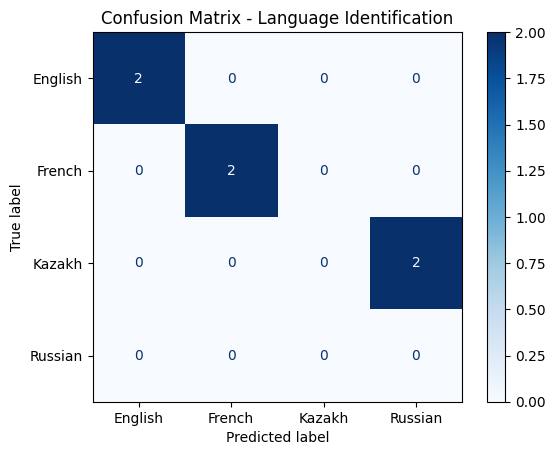

In [42]:
# === TF-IDF Features (char + bigram) ===
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))
X = vectorizer.fit_transform(df["clean_text"])
y = df["language"]

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === Train model ===
model = MultinomialNB()
model.fit(X_train, y_train)

# === Predict ===
y_pred = model.predict(X_test)

# === Accuracy and Reports ===
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# === Plot ===
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Language Identification")
plt.show()
